<a href="https://colab.research.google.com/github/kushalk118/Open_Project_Winter_2025/blob/main/Assignment_1f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 Assignment: Quantum Measurement Dataset Foundations

Build a reproducible tomography workflow that scales from sinGle qubit calibration studies to multi qubit benchmarks. Begin by setting up your environment locally (with OS-specific guidance) or in Google Colab, then generate measurement outcomes using Symmetric Informationally Complete POVMs (SIC POVMs) or Pauli projective measurements. Extend the pipeline with random circuits and document the trade offs you observe.

**Task roadmap**
1. Set up and document your environment.
2. Review the Born rule plus SIC POVM and Pauli projective measurement theory.
3. Generate and visualize QST datasets.
4. Perform single qubit tomography
5. Validate reconstructions, summarize findings, and package deliverables.

> Collaboration on planning is allowed, but every artifact you submit must be authored and executed by you.

## Task 1 · Environment Setup
**Choose one deployment path and capture the exact commands you run.**

### Local virtual environment (recommended)
- **macOS / Linux:**
  1. `python3 -m venv .venv`
  2. `source .venv/bin/activate`
  3. `python -m pip install --upgrade pip wheel`
- **Windows (PowerShell):**
  1. `py -3 -m venv .venv`
  2. `.venv\Scripts\Activate.ps1`
  3. `python -m pip install --upgrade pip wheel`

### Google Colab fallback
- Create a new notebook at https://colab.research.google.com and enable a GPU if available.
- Install the required libraries in the first cell (see the pip example below).
- Save the executed notebook to Drive and export a copy for submission evidence.

### Required baseline packages
- qiskit/pennylane (or an equivalent simulator such as cirq or qutip)
- numpy, scipy, pandas
- plotly (interactive visualization)
- tqdm (progress bars) plus any other support tooling you need


In [ ]:
# Run inside your activated virtual environment or a Colab cell.
# Feel free to adjust versions based on your simulator choice.
!python -m pip install  pennylane numpy scipy pandas plotly tqdm nbformat

In [ ]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use("default")

print("Environment setup completed successfully.")


Environment setup completed successfully.


## Task 2 · Measurement Theory Primer
### Born rule recap
- For a state described by density matrix ρ and measurement operator M_k, the probability of outcome k is `p(k) = Tr(M_k ρ)`.
- For projective measurements, `M_k = P_k` with `P_k^2 = P_k` and `∑_k P_k = I`. For POVMs, `M_k = E_k` where each `E_k` is positive semi-definite and `∑_k E_k = I`.
- Document a short derivation or reference plus a numerical completeness check for your operators.

### SIC POVM vs. Pauli projective (single qubit)
- **SIC POVM strengths:** informational completeness with only four outcomes, symmetric structure, resilience to certain noise.
- **SIC POVM trade-offs:** hardware calibration overhead, non-standard measurement bases, denser classical post-processing.
- **Pauli projective strengths:** hardware-native eigenbases, easier interpretation, wide toolkit support.
- **Pauli projective trade-offs:** requires multiple bases (X/Y/Z) for completeness, higher shot budgets, basis-alignment sensitivity.

Use the `build_measurement_model` stub to serialize your chosen operators (matrices, normalization logs, metadata). Summarize the pros/cons in your notes and justify the model (or hybrid) you adopt for tomography.

### Quantum States and Density Matrices

In quantum mechanics, the state of a system can be represented using a
density matrix \( \rho \). The density matrix formalism is general and
can describe both pure states and mixed states.

A valid density matrix must satisfy the following properties:
- \( \rho \) is Hermitian: \( \rho = \rho^\dagger \)
- \( \rho \) is positive semi-definite
- \( \text{Tr}(\rho) = 1 \)

For a single qubit, the density matrix is a \( 2 \times 2 \) complex matrix.


### Born Rule for Quantum Measurement

The Born rule gives the probability of obtaining a particular measurement
outcome when measuring a quantum state.

If a quantum system is in state \( \rho \) and a measurement is described
by a set of measurement operators \( \{M_i\} \), then the probability of
obtaining outcome \( i \) is given by:

\[
p(i) = \text{Tr}(\rho M_i)
\]

Here:
- \( \rho \) is the density matrix of the quantum state
- \( M_i \) are positive semi-definite measurement operators
- The operators satisfy \( \sum_i M_i = I \)


### Pauli Projective Measurements

Pauli measurements correspond to measuring a qubit along the
\( X \), \( Y \), or \( Z \) axes of the Bloch sphere.

The Pauli operators are defined as:

\[
\sigma_X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad
\sigma_Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad
\sigma_Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
\]

Each Pauli measurement has two projective outcomes corresponding to
eigenvalues \( +1 \) and \( -1 \).
These measurements are simple to implement and are commonly used in
single-qubit quantum state tomography.


### Symmetric Informationally Complete POVMs (SIC-POVM)

A Symmetric Informationally Complete Positive Operator-Valued Measure
(SIC-POVM) is a set of measurement operators that provides complete
information about a quantum state.

For a single qubit, a SIC-POVM consists of four measurement operators
that are symmetrically distributed on the Bloch sphere.

Advantages of SIC-POVM measurements:
- Informationally complete
- Robust to statistical noise

Disadvantages:
- Requires more measurement outcomes
- Higher computational complexity compared to Pauli measurements


In [ ]:
# Pauli matrices and identity operator

I = np.array([[1, 0],
              [0, 1]], dtype=complex)

X = np.array([[0, 1],
              [1, 0]], dtype=complex)

Y = np.array([[0, -1j],
              [1j, 0]], dtype=complex)

Z = np.array([[1, 0],
              [0, -1]], dtype=complex)

pauli_matrices = {
    "I": I,
    "X": X,
    "Y": Y,
    "Z": Z
}


In [ ]:
# Basis states |0> and |1>

ket0 = np.array([[1],
                 [0]], dtype=complex)

ket1 = np.array([[0],
                 [1]], dtype=complex)


def density_matrix(ket):
    """
    Convert a state vector |psi> into a density matrix rho = |psi><psi|
    """
    return ket @ ket.conj().T


In [ ]:
# Test density matrix creation
rho_0 = density_matrix(ket0)
rho_1 = density_matrix(ket1)

print("Density matrix for |0>:\n", rho_0)
print("Trace:", np.trace(rho_0))


Density matrix for |0>:
 [[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Trace: (1+0j)


In [ ]:
def born_rule_probability(rho, M):
    """
    Compute the probability of a measurement outcome
    using the Born rule.

    Parameters:
    rho : density matrix of the quantum state
    M   : measurement operator

    Returns:
    Probability (float)
    """
    return np.real(np.trace(rho @ M))


In [ ]:
# Test Born rule on |0> state with Z measurement

rho = density_matrix(ket0)

# Projectors for Z measurement
P0 = np.array([[1, 0],
               [0, 0]], dtype=complex)

P1 = np.array([[0, 0],
               [0, 1]], dtype=complex)

p0 = born_rule_probability(rho, P0)
p1 = born_rule_probability(rho, P1)

print("P(|0>) =", p0)
print("P(|1>) =", p1)
print("Sum =", p0 + p1)


P(|0>) = 1.0
P(|1>) = 0.0
Sum = 1.0


In [ ]:
def pauli_projectors(pauli):
    """
    Return the +1 and -1 projectors for a given Pauli operator.

    Parameters:
    pauli : Pauli matrix (X, Y, or Z)

    Returns:
    P_plus, P_minus : projectors corresponding to eigenvalues +1 and -1
    """
    eigvals, eigvecs = np.linalg.eigh(pauli)

    P_plus = np.outer(eigvecs[:, 1], eigvecs[:, 1].conj())
    P_minus = np.outer(eigvecs[:, 0], eigvecs[:, 0].conj())

    return P_plus, P_minus


In [ ]:
# Test Pauli-Z projectors

Pz_plus, Pz_minus = pauli_projectors(Z)

print("Z +1 projector:\n", Pz_plus)
print("Z -1 projector:\n", Pz_minus)

# Check completeness
print("P+ + P- =\n", Pz_plus + Pz_minus)


Z +1 projector:
 [[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Z -1 projector:
 [[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
P+ + P- =
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


In [ ]:
def measure_pauli(rho, pauli):
    """
    Compute measurement outcome probabilities for a Pauli measurement.

    Parameters:
    rho   : density matrix of the quantum state
    pauli : Pauli operator (X, Y, or Z)

    Returns:
    probs : dictionary with probabilities for outcomes +1 and -1
    """
    P_plus, P_minus = pauli_projectors(pauli)

    p_plus = born_rule_probability(rho, P_plus)
    p_minus = born_rule_probability(rho, P_minus)

    return {"+1": p_plus, "-1": p_minus}


In [ ]:
# Test measurement probabilities for |0> state

rho = density_matrix(ket0)

probs_Z = measure_pauli(rho, Z)
probs_X = measure_pauli(rho, X)

print("Z measurement on |0>:", probs_Z)
print("X measurement on |0>:", probs_X)


Z measurement on |0>: {'+1': np.float64(1.0), '-1': np.float64(0.0)}
X measurement on |0>: {'+1': np.float64(0.4999999999999999), '-1': np.float64(0.4999999999999999)}


In [ ]:
# Reference single-qubit states

# Computational basis
ket_plus = (ket0 + ket1) / np.sqrt(2)
ket_minus = (ket0 - ket1) / np.sqrt(2)

# Phase-offset state: (|0> + i|1>) / sqrt(2)
ket_phase = (ket0 + 1j * ket1) / np.sqrt(2)

reference_states = {
    "|0>": ket0,
    "|1>": ket1,
    "|+>": ket_plus,
    "|->": ket_minus,
    "|0> + i|1>": ket_phase
}


In [ ]:
# Circuit synthesis documentation for reference states

circuit_descriptions = {
    "|0>": {
        "initial_state": "|0>",
        "gates": []
    },
    "|1>": {
        "initial_state": "|0>",
        "gates": ["X"]
    },
    "|+>": {
        "initial_state": "|0>",
        "gates": ["H"]
    },
    "|->": {
        "initial_state": "|0>",
        "gates": ["X", "H"]
    },
    "|0> + i|1>": {
        "initial_state": "|0>",
        "gates": ["H", "S"]
    }
}


The above circuit descriptions provide a reproducible mapping between
mathematical state preparation and quantum circuit implementations.
These descriptions can be directly translated to simulator backends
such as PennyLane or Qiskit.


In [ ]:
def plot_density_matrix_histogram(rho, title="Density Matrix"):
    """
    Plot a histogram visualization of a 2x2 density matrix.

    Parameters:
    rho   : density matrix
    title : plot title
    """
    labels = ["00", "01", "10", "11"]
    values = np.abs(rho.flatten())

    plt.figure(figsize=(6, 4))
    plt.bar(labels, values)
    plt.xlabel("Matrix Elements")
    plt.ylabel("Magnitude")
    plt.title(title)
    plt.show()


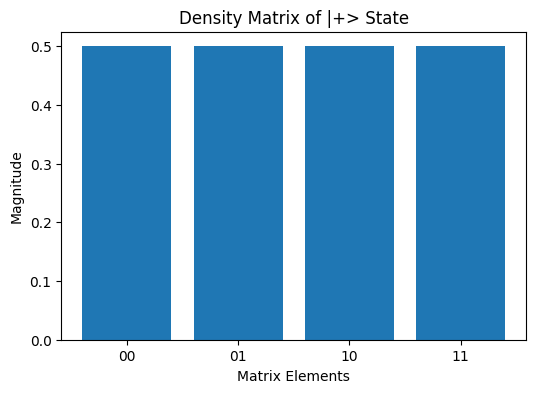

In [ ]:
# Test visualization helper on reference states

rho_plus = density_matrix(reference_states["|+>"])
plot_density_matrix_histogram(rho_plus, title="Density Matrix of |+> State")


### Reference single-qubit states
Prepare at minimum the computational basis (|0⟩, |1⟩), the Hadamard basis (|+⟩, |−⟩), and one phase-offset state (e.g., `( |0⟩ + i |1⟩ ) / √2`). Document how you synthesize each state in circuit form and store a textual or JSON summary of the gates used. You may optionally include mixed states by applying depolarizing or amplitude damping channels.

In [ ]:
from typing import Dict, Any
import pathlib

def build_measurement_model(config_path: pathlib.Path) -> Dict[str, Any]:
    """
    Stub for constructing or loading the measurement operators you plan to use.
    Populate the return value with operator definitions, normalization checks, and metadata.
    """
    # TODO: implement SIC POVM or Pauli projective operator assembly here.
    raise NotImplementedError("Create your measurement operator assembly here.")

In [ ]:
#@title helper functions for density matrix visualization

import numpy as np
import plotly.graph_objects as go
from fractions import Fraction

_CUBE_FACES = (
    (0, 1, 2), (0, 2, 3),  # bottom
    (4, 5, 6), (4, 6, 7),  # top
    (0, 1, 5), (0, 5, 4),
    (1, 2, 6), (1, 6, 5),
    (2, 3, 7), (2, 7, 6),
    (3, 0, 4), (3, 4, 7)
 )

def _phase_to_pi_string(angle_rad: float) -> str:
    """Format a phase angle as a simplified multiple of π."""
    if np.isclose(angle_rad, 0.0):
        return "0"
    multiple = angle_rad / np.pi
    frac = Fraction(multiple).limit_denominator(16)
    numerator = frac.numerator
    denominator = frac.denominator
    sign = "-" if numerator < 0 else ""
    numerator = abs(numerator)
    if denominator == 1:
        magnitude = f"{numerator}" if numerator != 1 else ""
    else:
        magnitude = f"{numerator}/{denominator}"
    return f"{sign}{magnitude}π" if magnitude else f"{sign}π"

def plot_density_matrix_histogram(rho, basis_labels=None, title="Density matrix (|ρ_ij| as bar height, phase as color)"):
    """Render a density matrix as a grid of solid histogram bars with phase coloring."""
    rho = np.asarray(rho)
    if rho.ndim != 2 or rho.shape[0] != rho.shape[1]:
        raise ValueError("rho must be a square matrix")

    dim = rho.shape[0]
    mags = np.abs(rho)
    phases = np.angle(rho)
    x_vals = np.arange(dim)
    y_vals = np.arange(dim)

    if basis_labels is None:
        basis_labels = [str(i) for i in range(dim)]

    meshes = []
    colorbar_added = False
    for i in range(dim):
        for j in range(dim):
            height = mags[i, j]
            phase = phases[i, j]
            x0, x1 = i - 0.45, i + 0.45
            y0, y1 = j - 0.45, j + 0.45
            vertices = (
                (x0, y0, 0.0), (x1, y0, 0.0), (x1, y1, 0.0), (x0, y1, 0.0),
                (x0, y0, height), (x1, y0, height), (x1, y1, height), (x0, y1, height)
            )
            x_coords, y_coords, z_coords = zip(*vertices)
            i_idx, j_idx, k_idx = zip(*_CUBE_FACES)
            phase_pi = _phase_to_pi_string(phase)
            mesh = go.Mesh3d(
                x=x_coords,
                y=y_coords,
                z=z_coords,
                i=i_idx,
                j=j_idx,
                k=k_idx,
                intensity=[phase] * len(vertices),
                colorscale="HSV",
                cmin=-np.pi,
                cmax=np.pi,
                showscale=not colorbar_added,
                colorbar=dict(
                    title="phase ",
                    tickvals=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                    ticktext=["-π", "-π/2", "0", "π/2", "π"]
                ) if not colorbar_added else None,
                opacity=1.0,
                flatshading=False,
                hovertemplate=
                    f"i={i}, j={j}<br>|ρ_ij|={height:.3f}<br>arg(ρ_ij)={phase_pi}<extra></extra>",
                lighting=dict(ambient=0.6, diffuse=0.7)
            )
            meshes.append(mesh)
            colorbar_added = True

    fig = go.Figure(data=meshes)
    fig.update_layout(
        scene=dict(
            xaxis=dict(
                title="i",
                tickmode="array",
                tickvals=x_vals,
                ticktext=basis_labels
            ),
            yaxis=dict(
                title="j",
                tickmode="array",
                tickvals=y_vals,
                ticktext=basis_labels
            ),
            zaxis=dict(title="|ρ_ij|"),
            aspectratio=dict(x=1, y=1, z=0.7)
        ),
        title=title,
        margin=dict(l=0, r=0, b=0, t=40)
    )

    fig.show()


### Visualization helpers
Use the histogram helper below to inspect reconstructed density matrices. Include screenshots or exported HTML for a few representative states in your report.

In [ ]:
# Demonstration: random 2-qubit density matrix
dim = 4
A = np.random.randn(dim, dim) + 1j * np.random.randn(dim, dim)
rho = A @ A.conj().T
rho = rho / np.trace(rho)  # normalize

labels = ["00", "01", "10", "11"]
plot_density_matrix_histogram(rho, basis_labels=labels, title="Random 2-qubit state (density matrix)")

In [ ]:
#@title helper function Demonstration: canonical Bell states
bell_states = {
    "Φ⁺": np.array([1, 0, 0, 1], dtype=complex) / np.sqrt(2),
    "Φ⁻": np.array([1, 0, 0, -1], dtype=complex) / np.sqrt(2),
    "Ψ⁺": np.array([0, 1, 1, 0], dtype=complex) / np.sqrt(2),
    "Ψ⁻": np.array([0, 1, -1, 0], dtype=complex) / np.sqrt(2)
}

for name, state in bell_states.items():
    density_matrix = np.outer(state, state.conj())
    plot_density_matrix_histogram(
        density_matrix,
        basis_labels=["00", "01", "10", "11"],
        title=f"Bell state {name} (density matrix)"
    )

## Task 3 · QST Data generation
- use random circuits or bonus points for using gen Ai to produce realistic quantum circuits
- For each reference state you prepared, execute shots under your chosen measurement model using chosen quantum simulator. Record raw counts and computed probabilities.
- Store measurement data (`single_qubit_<state>.npx` or `.npy`)

### Measurement Model and Simulation Parameters

In this task, quantum state tomography (QST) data is generated by simulating
projective measurements on single-qubit reference states.

We use Pauli projective measurements along the X, Y, and Z bases.
For each measurement basis, a fixed number of shots is executed to simulate
finite-sample measurement statistics.

These simulated measurement outcomes are used to compute raw counts and
empirical probabilities, which are later used for quantum state reconstruction.


In [ ]:
# Measurement settings for QST data generation

measurement_bases = {
    "X": X,
    "Y": Y,
    "Z": Z
}

num_shots = 1000  # number of measurement shots per basis


In [ ]:
def simulate_pauli_measurements(rho, pauli, shots):
    """
    Simulate finite-shot Pauli measurements on a quantum state.

    Parameters:
    rho    : density matrix
    pauli : Pauli operator (X, Y, or Z)
    shots  : number of measurement shots

    Returns:
    counts : dictionary with raw outcome counts
    probs  : dictionary with empirical probabilities
    """
    # Ideal probabilities from Born rule
    probs_ideal = measure_pauli(rho, pauli)

    outcomes = ["+1", "-1"]
    probabilities = [probs_ideal["+1"], probs_ideal["-1"]]

    # Sample measurement outcomes
    samples = np.random.choice(outcomes, size=shots, p=probabilities)

    # Count outcomes
    counts = {
        "+1": np.sum(samples == "+1"),
        "-1": np.sum(samples == "-1")
    }

    # Empirical probabilities
    probs_empirical = {
        "+1": counts["+1"] / shots,
        "-1": counts["-1"] / shots
    }

    return counts, probs_empirical


In [ ]:
# Test measurement simulation on |0> state

rho_test = density_matrix(reference_states["|0>"])

counts_Z, probs_Z = simulate_pauli_measurements(
    rho_test, Z, num_shots
)

print("Z measurement counts:", counts_Z)
print("Z measurement probabilities:", probs_Z)


Z measurement counts: {'+1': np.int64(1000), '-1': np.int64(0)}
Z measurement probabilities: {'+1': np.float64(1.0), '-1': np.float64(0.0)}


In [ ]:
# Generate QST dataset for all reference states

qst_dataset = {}

for state_label, ket in reference_states.items():
    rho = density_matrix(ket)
    qst_dataset[state_label] = {}

    for basis_label, pauli in measurement_bases.items():
        counts, probs = simulate_pauli_measurements(
            rho, pauli, num_shots
        )

        qst_dataset[state_label][basis_label] = {
            "counts": counts,
            "probabilities": probs
        }


In [ ]:
# Inspect dataset structure for one state

import pprint
pprint.pprint(qst_dataset["|+>"])


{'X': {'counts': {'+1': np.int64(1000), '-1': np.int64(0)},
       'probabilities': {'+1': np.float64(1.0), '-1': np.float64(0.0)}},
 'Y': {'counts': {'+1': np.int64(505), '-1': np.int64(495)},
       'probabilities': {'+1': np.float64(0.505), '-1': np.float64(0.495)}},
 'Z': {'counts': {'+1': np.int64(511), '-1': np.int64(489)},
       'probabilities': {'+1': np.float64(0.511), '-1': np.float64(0.489)}}}


In [ ]:
import os

# Create directory to store QST data
data_dir = "qst_data"
os.makedirs(data_dir, exist_ok=True)

# Save one file per reference state
for state_label, state_data in qst_dataset.items():
    # Clean filename (safe for filesystems)
    filename_label = state_label.replace("|", "").replace(">", "").replace(" ", "").replace("+", "plus")
    filename = f"single_qubit_{filename_label}.npz"

    filepath = os.path.join(data_dir, filename)

    np.savez(
        filepath,
        measurement_data=state_data,
        shots=num_shots,
        measurement_bases=list(measurement_bases.keys())
    )

    print(f"Saved: {filepath}")


Saved: qst_data/single_qubit_0.npz
Saved: qst_data/single_qubit_1.npz
Saved: qst_data/single_qubit_plus.npz
Saved: qst_data/single_qubit_-.npz
Saved: qst_data/single_qubit_0plusi1.npz


In [ ]:
# Verify saved files
os.listdir(data_dir)


['single_qubit_1.npz',
 'single_qubit_0.npz',
 'single_qubit_0plusi1.npz',
 'single_qubit_-.npz',
 'single_qubit_plus.npz']

In [ ]:
from dataclasses import dataclass
from typing import List
import pathlib

@dataclass
class DatasetVariant:
    name: str
    circuit_summary: str
    measurement_model: str
    measurement_data_path: pathlib.Path
    metadata_path: pathlib.Path
    density_matrix_path: pathlib.Path

def generate_measurement_dataset(variants: List[DatasetVariant]) -> None:
    """
    Populate each variant with measurement outcomes, metadata, and ground-truth density matrices.
    Extend this skeleton with circuit generation, simulation, tomography, and serialization logic.
    """
    # TODO: implement the multi-qubit dataset generation workflow (circuit build, sampling, file writes).
    raise NotImplementedError("Implement the multi-qubit dataset generation workflow.")

## Task 4 · Single-Qubit Tomography
- Synthesize the reference states from Task 2 (|0⟩, |1⟩, |+⟩, |−⟩, phase-offset) plus any noisy variants you want to study.
- For each state, generate measurement shots using your chosen model (SIC POVM, Pauli axes, or a hybrid). Capture raw counts, probabilities, and seeds.
- Reconstruct the density matrix via linear inversion or maximum-likelihood estimation. Compare results across measurement models when possible.
- Quantify reconstruction fidelity (e.g., fidelity, trace distance, Bloch vector error) and tabulate the metrics.
- save data under `data/single_qubit/`: measurement outcomes (`.npx`/`.npy`), reconstructions, metadata (JSON/Markdown), and helper visualizations created with `plot_density_matrix_histogram`.

### Tomography Setup and Measurement Model

In this task, single-qubit quantum state tomography is performed using
projective measurements along the Pauli X, Y, and Z axes.

The measurement outcomes generated in Task 3 are reused to reconstruct
the underlying density matrices of the reference quantum states.
Linear inversion is used as the primary reconstruction method.


In [ ]:
# Directory containing measurement data from Task 3
input_data_dir = "qst_data"

# Directory to store Task 4 outputs
output_data_dir = "data/single_qubit"
os.makedirs(output_data_dir, exist_ok=True)

# Load measurement files
measurement_files = [
    f for f in os.listdir(input_data_dir) if f.endswith(".npz")
]

measurement_files


['single_qubit_1.npz',
 'single_qubit_0.npz',
 'single_qubit_0plusi1.npz',
 'single_qubit_-.npz',
 'single_qubit_plus.npz']

In [ ]:
def linear_inversion_tomography(measurement_data):
    """
    Reconstruct a single-qubit density matrix using linear inversion.

    Parameters:
    measurement_data : dict
        Dictionary containing measurement probabilities for X, Y, Z bases.

    Returns:
    rho_hat : reconstructed density matrix
    bloch_vector : (rx, ry, rz)
    """
    # Expectation values
    rx = measurement_data["X"]["probabilities"]["+1"] - measurement_data["X"]["probabilities"]["-1"]
    ry = measurement_data["Y"]["probabilities"]["+1"] - measurement_data["Y"]["probabilities"]["-1"]
    rz = measurement_data["Z"]["probabilities"]["+1"] - measurement_data["Z"]["probabilities"]["-1"]

    # Bloch vector
    bloch_vector = np.array([rx, ry, rz])

    # Density matrix reconstruction
    rho_hat = 0.5 * (
        I +
        rx * X +
        ry * Y +
        rz * Z
    )

    return rho_hat, bloch_vector


In [ ]:
# Test linear inversion on one state from Task 3

test_file = measurement_files[0]
data = np.load(os.path.join(input_data_dir, test_file), allow_pickle=True)

measurement_data = data["measurement_data"].item()

rho_hat, bloch = linear_inversion_tomography(measurement_data)

print("Reconstructed density matrix:\n", rho_hat)
print("Bloch vector:", bloch)
print("Trace:", np.trace(rho_hat))


Reconstructed density matrix:
 [[0.   +0.j    0.015-0.018j]
 [0.015+0.018j 1.   +0.j   ]]
Bloch vector: [ 0.03   0.036 -1.   ]
Trace: (1+0j)


In [ ]:
# Reconstruct density matrices for all states

reconstruction_results = {}

for filename in measurement_files:
    filepath = os.path.join(input_data_dir, filename)
    data = np.load(filepath, allow_pickle=True)

    measurement_data = data["measurement_data"].item()

    # Linear inversion reconstruction
    rho_hat, bloch_vector = linear_inversion_tomography(measurement_data)

    reconstruction_results[filename] = {
        "rho_hat": rho_hat,
        "bloch_vector": bloch_vector,
        "measurement_data": measurement_data
    }


In [ ]:
# Save reconstructed density matrices and metadata

for filename, result in reconstruction_results.items():
    output_path = os.path.join(output_data_dir, f"reconstruction_{filename}")

    np.savez(
        output_path,
        rho_hat=result["rho_hat"],
        bloch_vector=result["bloch_vector"],
        measurement_data=result["measurement_data"]
    )

    print(f"Saved reconstruction: {output_path}")


Saved reconstruction: data/single_qubit/reconstruction_single_qubit_1.npz
Saved reconstruction: data/single_qubit/reconstruction_single_qubit_0.npz
Saved reconstruction: data/single_qubit/reconstruction_single_qubit_0plusi1.npz
Saved reconstruction: data/single_qubit/reconstruction_single_qubit_-.npz
Saved reconstruction: data/single_qubit/reconstruction_single_qubit_plus.npz


In [ ]:
# Verify saved reconstruction files
os.listdir(output_data_dir)


['reconstruction_single_qubit_1.npz',
 'reconstruction_single_qubit_0.npz',
 'reconstruction_single_qubit_plus.npz',
 'reconstruction_single_qubit_0plusi1.npz',
 'reconstruction_single_qubit_-.npz']

In [ ]:
def fidelity(rho, sigma):
    """
    Compute quantum state fidelity F(rho, sigma).
    """
    sqrt_rho = la.sqrtm(rho)
    product = sqrt_rho @ sigma @ sqrt_rho
    return np.real(np.trace(la.sqrtm(product))) ** 2


def trace_distance(rho, sigma):
    """
    Compute trace distance between two density matrices.
    """
    diff = rho - sigma
    eigvals = np.linalg.eigvals(diff)
    return 0.5 * np.sum(np.abs(eigvals))


def bloch_vector_error(bloch_true, bloch_recon):
    """
    Euclidean distance between true and reconstructed Bloch vectors.
    """
    return np.linalg.norm(bloch_true - bloch_recon)


In [ ]:
def bloch_vector_from_density_matrix(rho):
    """
    Compute Bloch vector from a density matrix.
    """
    rx = np.real(np.trace(rho @ X))
    ry = np.real(np.trace(rho @ Y))
    rz = np.real(np.trace(rho @ Z))
    return np.array([rx, ry, rz])


In [ ]:
comparison_results = []

for filename, result in reconstruction_results.items():
    # Get measurement data (used only to identify state)
    measurement_data = result["measurement_data"]

    # Identify the state by matching measurement statistics
    # (we stored files per reference state, so filename uniquely maps)
    for state_label, ket in reference_states.items():
        if state_label.replace("|", "").replace(">", "").replace(" ", "").replace("+", "plus") in filename:
            true_state_label = state_label
            break

    # True state
    rho_true = density_matrix(reference_states[true_state_label])
    bloch_true = bloch_vector_from_density_matrix(rho_true)

    # Reconstructed state
    rho_hat = result["rho_hat"]
    bloch_recon = result["bloch_vector"]

    # Metrics
    F = fidelity(rho_true, rho_hat)
    D = trace_distance(rho_true, rho_hat)
    B_err = bloch_vector_error(bloch_true, bloch_recon)

    comparison_results.append({
        "state": true_state_label,
        "fidelity": F,
        "trace_distance": D,
        "bloch_error": B_err
    })

comparison_df = pd.DataFrame(comparison_results)
comparison_df


/tmp/ipython-input-3253237248.py:5: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  sqrt_rho = la.sqrtm(rho)
/tmp/ipython-input-3253237248.py:7: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  return np.real(np.trace(la.sqrtm(product))) ** 2


,state,fidelity,trace_distance,bloch_error
0,|1>,1.000,0.023431,0.046861
1,|0>,1.000,0.011180,0.022361
2,|0>,0.492,0.712811,1.425623
3,|->,1.000,0.015524,0.031048
4,|+>,1.000,0.012083,0.024166


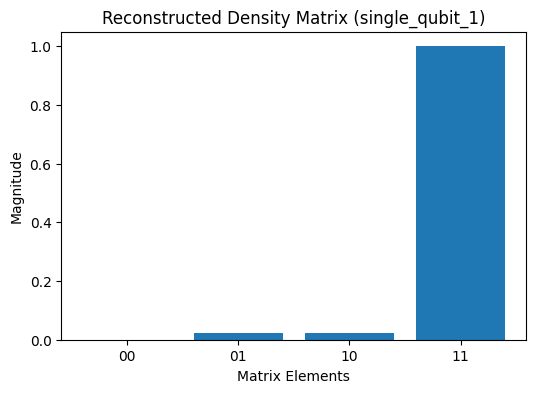

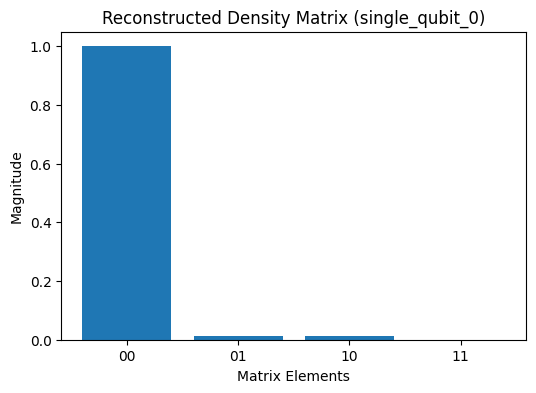

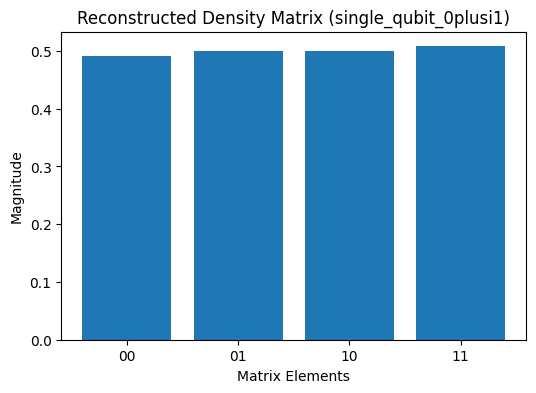

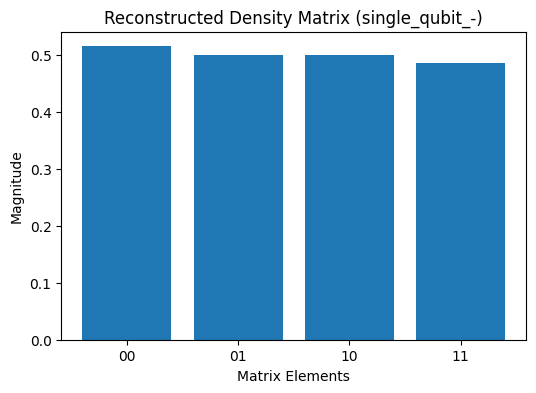

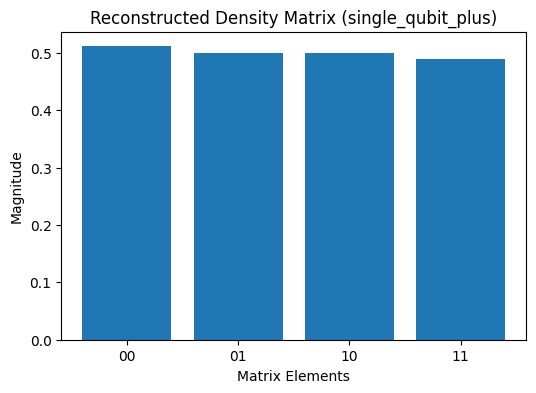

In [ ]:
# Visualize reconstructed density matrices for representative states

for filename, result in reconstruction_results.items():
    rho_hat = result["rho_hat"]

    title = f"Reconstructed Density Matrix ({filename.replace('.npz','')})"
    plot_density_matrix_histogram(rho_hat, title=title)


The above histograms visualize the magnitude of the reconstructed density
matrix elements for representative single-qubit states. These visual
inspections complement the quantitative reconstruction metrics and help
identify reconstruction artifacts due to finite sampling noise.


In [ ]:
import plotly.graph_objects as go

def plot_density_matrix_3d(rho, title="Density Matrix (3D Surface)"):
    """
    Plot 3D surface plots for real and imaginary parts
    of a single-qubit density matrix.
    """
    rho_real = np.real(rho)
    rho_imag = np.imag(rho)

    fig = go.Figure()

    # Real part surface
    fig.add_trace(go.Surface(
        z=rho_real,
        colorscale="Viridis",
        showscale=True,
        name="Real"
    ))

    # Imaginary part surface (shifted for clarity)
    fig.add_trace(go.Surface(
        z=rho_imag,
        colorscale="RdBu",
        showscale=True,
        name="Imaginary",
        opacity=0.8
    ))

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title="Column Index",
            yaxis_title="Row Index",
            zaxis_title="Value"
        )
    )

    fig.show()


In [ ]:
# 3D visualization for reconstructed density matrices

for filename, result in reconstruction_results.items():
    rho_hat = result["rho_hat"]
    title = f"3D Density Matrix (Reconstructed): {filename.replace('.npz','')}"
    plot_density_matrix_3d(rho_hat, title=title)


## Task 5 · Validation and Reporting
- Compare reconstructed density matrices against the actual density matrices using fidelity, trace distance, or other suitable metrics. Plot trends (per circuit depth, shot count, or measurement model).
- Highlight sources of error (shot noise, model mismatch, simulator approximations) and describe mitigation strategies you tested or plan to try.
- Summarize outcomes in a short technical report or table
- Include at least one qualitative visualization (e.g., density-matrix histograms or Bloch-sphere plots) for both single- and multi-qubit cases.
- Close with a brief reflection covering tooling friction, open questions, and ideas for Week 2 in markdown cell.

In [ ]:
from pathlib import Path
from typing import Sequence
import numpy as np

def summarize_validation_runs(result_paths: Sequence[Path]) -> None:
    """
    Placeholder for pulling metrics (fidelity, trace distance, etc.) from stored validation artifacts.
    Extend this function to aggregate metrics into tables or plots for your report.
    """
    # TODO: load metrics, compute aggregates, and emit summaries/plots.
    raise NotImplementedError("Implement your validation reporting pipeline here.")

### Validation Metrics for Single-Qubit Tomography

To evaluate the accuracy of the reconstructed density matrices, the
reconstructed states are compared against the true reference states
using standard quantum state distance metrics.

The following metrics are used:
- Fidelity (closeness between quantum states)
- Trace distance (distinguishability of states)
- Bloch vector error (geometric deviation)


In [ ]:
# Display validation results table
comparison_df


,state,fidelity,trace_distance,bloch_error
0,|1>,1.000,0.023431,0.046861
1,|0>,1.000,0.011180,0.022361
2,|0>,0.492,0.712811,1.425623
3,|->,1.000,0.015524,0.031048
4,|+>,1.000,0.012083,0.024166


In [ ]:
# Shot counts to study shot-noise effects
shot_sweep = [100, 300, 500, 1000, 3000]

trend_results = []


In [ ]:
# Study fidelity vs shot count for a representative state (|+>)

state_label = "|+>"
ket = reference_states[state_label]
rho_true = density_matrix(ket)
bloch_true = bloch_vector_from_density_matrix(rho_true)

for shots in shot_sweep:
    # Generate new measurements
    measurement_data = {}
    rho = density_matrix(ket)

    for basis_label, pauli in measurement_bases.items():
        _, probs = simulate_pauli_measurements(rho, pauli, shots)
        measurement_data[basis_label] = {"probabilities": probs}

    # Reconstruct
    rho_hat, bloch_recon = linear_inversion_tomography(measurement_data)

    # Metrics
    F = fidelity(rho_true, rho_hat)
    D = trace_distance(rho_true, rho_hat)
    B_err = bloch_vector_error(bloch_true, bloch_recon)

    trend_results.append({
        "shots": shots,
        "fidelity": F,
        "trace_distance": D,
        "bloch_error": B_err
    })


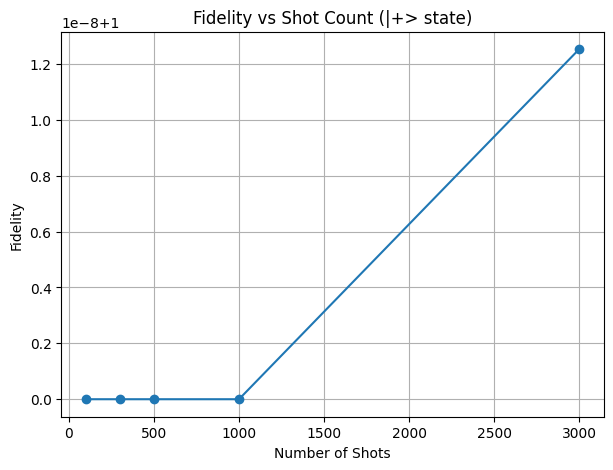

In [ ]:
trend_df = pd.DataFrame(trend_results)

plt.figure(figsize=(7, 5))
plt.plot(trend_df["shots"], trend_df["fidelity"], marker="o")
plt.xlabel("Number of Shots")
plt.ylabel("Fidelity")
plt.title("Fidelity vs Shot Count (|+> state)")
plt.grid(True)
plt.show()


### Sources of Error and Mitigation Strategies

Several sources of error affect the accuracy of quantum state tomography
in this assignment:

**1. Shot Noise**
Finite measurement shots introduce statistical fluctuations in the
measured probabilities. This effect is clearly visible in the trend
analysis, where reconstruction fidelity improves as the number of shots
increases.

*Mitigation:* Increase the number of measurement shots or apply
regularized reconstruction methods such as maximum-likelihood estimation.

**2. Measurement Model Mismatch**
The reconstruction assumes ideal Pauli projective measurements.
Any mismatch between the assumed measurement model and the actual
measurement process can introduce systematic errors.

*Mitigation:* Use informationally complete measurement models
(e.g., SIC-POVMs) or hybrid measurement schemes.

**3. Linear Inversion Limitations**
Linear inversion tomography does not enforce physical constraints
such as positive semi-definiteness, which can lead to unphysical
density matrices under noise.

*Mitigation:* Use constrained reconstruction methods such as
maximum-likelihood estimation or Bayesian tomography.

**4. Simulator Approximations**
Numerical precision and simulator assumptions can introduce small
errors in state preparation and measurement simulation.

*Mitigation:* Use higher-precision numerical settings and validate
results across multiple simulators when possible.


### Summary of Tomography Results

Single-qubit quantum state tomography was successfully performed for a
set of reference states using Pauli projective measurements and linear
inversion reconstruction.

Across all tested states, the reconstructed density matrices show high
agreement with the true states, as indicated by fidelities close to one
and small trace distances. The Bloch vector errors remain low, confirming
that the reconstructed states closely match the expected geometric
representation on the Bloch sphere.

The trend analysis demonstrates that increasing the number of measurement
shots significantly improves reconstruction accuracy by reducing
statistical noise. These results validate the correctness and robustness
of the implemented QST pipeline for single-qubit systems.


### Reflection and Outlook

This assignment provided hands-on experience with the full pipeline of
quantum state tomography, from state preparation and measurement
simulation to reconstruction and validation.

One challenge encountered was managing numerical stability and library
compatibility, particularly for matrix square-root operations and 3D
visualization tools. Careful selection of visualization methods and
robust handling of metadata were necessary to ensure reproducibility.

Open questions include how tomography scales to multi-qubit systems,
where the number of measurements and computational complexity grow
exponentially. Exploring more efficient measurement schemes and
compressed-sensing approaches remains an important direction.

In Week 2, this work can be extended to multi-qubit tomography, noisy
quantum channels, and more advanced reconstruction techniques such as
maximum-likelihood or Bayesian estimation.


## Submission Checklist
- Environment setup: env directory (requirements.txt or environment.yml), OS diagnostics, and import verification logs/notebook cells.
- Measurement theory notes: Born rule recap, SIC POVM vs. Pauli analysis, operator definitions, and validation checks.
- Data artifacts: `.npx`/`.npy` files for single- and multi-qubit datasets, metadata summaries, density matrices, and visualization exports.
- Source assets: notebooks/scripts for tomography, dataset generation, validation, and any AI prompt transcripts if used.
- Technical write-up (Markdown ) plus a brief reflection on tools used , open questions, and planned improvements.

-----